In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 15,
    horizontal_flip = True,
    zoom_range = 0.2,
    shear_range = 0.1,
    fill_mode = 'reflect',
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split = 0.15
)

train_data = train_datagen.flow_from_directory(
    'dataset/training',
    target_size=(128, 128),      
    batch_size=32,
    class_mode='binary',
    subset='training'
)

valid_data = train_datagen.flow_from_directory(
    'dataset/training',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 18407 images belonging to 2 classes.
Found 3247 images belonging to 2 classes.


In [37]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 6599 images belonging to 2 classes.


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape = (128,128,3))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1,activation='sigmoid'))


In [32]:
#model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'],
)

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,112,001 (19.50 MB)

 Trainable params: 5,110,017 (19.49 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience=2,
    factor=0.5,
    min_lr = 0.00001,
    verbose = 1
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose= 0)

In [35]:
hist = model.fit(
    train_data,
    validation_data=valid_data,
    batch_size=32, 
    epochs=30,  
    callbacks=[early_stopping,learning_rate_reduction],
    verbose = 1
)

Epoch 1/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 294s 503ms/step - accuracy: 0.6181 - loss: 0.8097 - val_accuracy: 0.5925 - val_loss: 0.7844 - learning_rate: 0.0010
Epoch 2/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 193s 334ms/step - accuracy: 0.7241 - loss: 0.5446 - val_accuracy: 0.7133 - val_loss: 0.5526 - learning_rate: 0.0010
Epoch 3/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 195s 339ms/step - accuracy: 0.7783 - loss: 0.4683 - val_accuracy: 0.8152 - val_loss: 0.4068 - learning_rate: 0.0010
Epoch 4/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 200s 348ms/step - accuracy: 0.8125 - loss: 0.4092 - val_accuracy: 0.6640 - val_loss: 0.7456 - learning_rate: 0.0010
Epoch 5/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 193s 336ms/step - accuracy: 0.8306 - loss: 0.3747 - val_accuracy: 0.8512 - val_loss: 0.3392 - learning_rate: 0.0010
Epoch 6/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 197s 342ms/step - accuracy: 0.8552 - loss: 0.3214 - val_accuracy: 0.7832 - val_loss: 0.4455 - learning_rate: 0.0010
Epoch 7/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 194s 336ms/step - accura

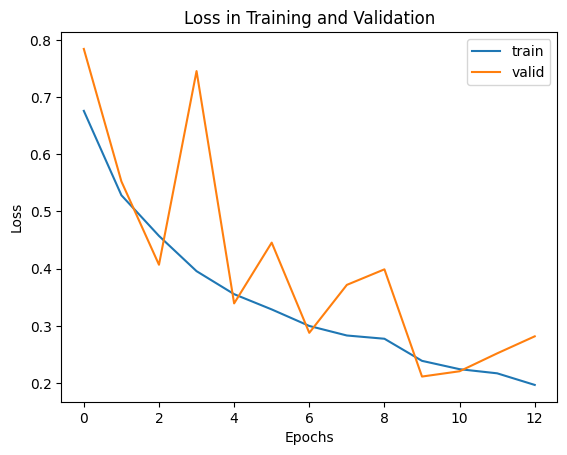

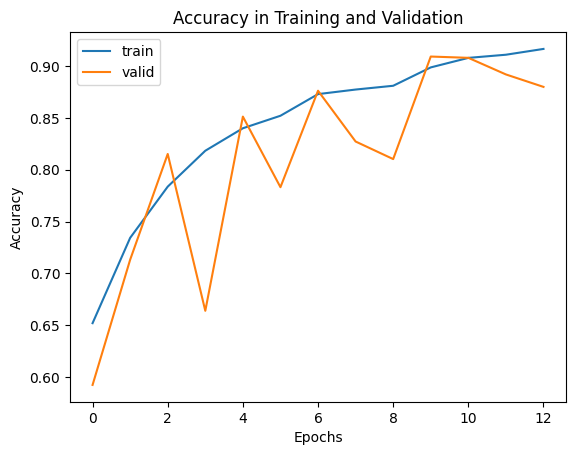

In [36]:
import matplotlib.pyplot as plt


plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='valid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss in Training and Validation')
plt.show()


if 'accuracy' in hist.history: 
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='valid')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy in Training and Validation')
    plt.show()

In [40]:
result = model.predict(test_data,batch_size = 32,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

loss, acc = model.evaluate(test_data, batch_size = 32, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 93.78693699836731
The Loss of the model for testing data is: 0.1559499055147171


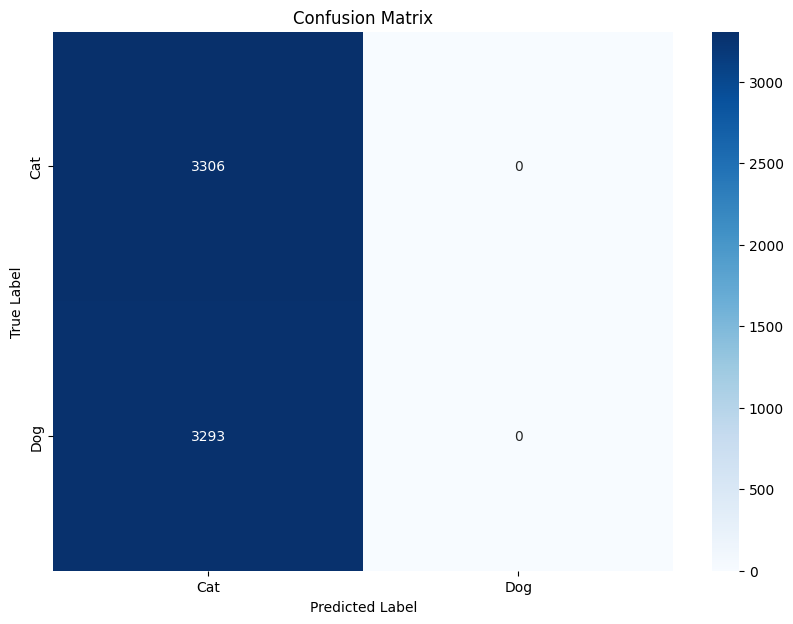

In [45]:
import seaborn as sns

matrix = tf.math.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(
    matrix.numpy(), 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Cat', 'Dog'], 
    yticklabels=['Cat', 'Dog']
)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()